**AIRBNB CASE STUDY**

Airbnb helps people find places to stay and lets homeowners rent out their spaces. This dataset shows information about Airbnb listings in New York city in 2019

It includes detaila baout the different places, their prices, location, and how often they are booked. There are 48,895 listings with 16 types of information about each one.

Dataset Link: https://drive.google.com/file/d/1_0t1xIIXBnhHA_uWsQ2RR7p52PZgph3i/view?usp=sharing

**BUSINESS PROBLEM**
1. Hosts and Areas-what can we learn about diff Airbnb hosts and the areas they list in?
2. Prediction-can we guess thing like price,number of reviews,and popularity based on the data?
3. Busiest Hosts-who are the most active hosts,and why do they get so many booking?
4. Traffic differences-Are some areas busier than other? what might be the reasons?


In [ ]:
# step 1 - importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# configurational library
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb_data.csv')
df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**Data inspection**

New York city --> Neighbourhood Groups ---> multiple neighbours

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Insights**

On analyizing the data, we found out that two of the columns were having null values (last review, reviews per month)
There are few columns where we can change the name of those columns

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
renameColList = {
    'id' : 'property_id',
    'name': 'property_name',
    'number_of_reviews': 'Total_reviews',
    'calculated_host_listings_count': 'host_listing_count',
    'availability_365': 'Availabilty'

}

In [ ]:
df.rename(columns=renameColList,inplace=True)

In [ ]:
df.head()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Total_reviews,last_review,reviews_per_month,host_listing_count,Availabilty
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()
df.size
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

**Insight**

The columns that are property_name, host_name, last_review, reviews_per_month we are having some null values

**WORKING ON UPDATES**

In [ ]:
df.last_review

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
...,...
48890,NaN
48891,NaN
48892,NaN
48893,NaN


**We can simply drop this column since it looks like we don't need it for our analysis purpose**

In [ ]:
#drop the lasr review column
df.drop('last_review',axis=1,inplace=True)


In [ ]:
# check the duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df['name'].fillna('unknow',inplace=True)
df['host_name'].fillna('unknow',inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# replace review per months to last review
df['reviews_per_month']=df.reviews_per_month.replace(to_replace=np.nan,value=0).astype(float)

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df.tail()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Total_reviews,reviews_per_month,host_listing_count,Availabilty
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,1,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
# How many unique properties are there in new york city
a=df.id.nunique()
print(f'the total number of unique properties are in new york city is {a}')

the total number of unique properties are in new york city is 48895


In [ ]:
# how many neighbourhood group we are having
b=df.neighbourhood_group.nunique()
print(f'the total number of unique neighbourhood group {b}')

the total number of unique neighbourhood group 5


In [ ]:
# how many neighbourhood we are having
b=df.neighbourhood.nunique()
print(f'the total number of unique neighbourhood  {b}')

the total number of unique neighbourhood  221


In [ ]:
# how many host are available in NYC
b=df.host_name.nunique()
print(f'the total number of unique host name {b}')

the total number of unique host name 11453


**INSIGHTS**:  In NYC we are having 5 neighbourhood group in total cansist of 221 colonies(neighbour).in these all colonies, a total of 11453 owners are present who owns around 47906 properties out of 48895.

**STATISTICAL DERIVATION**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


**Insights**
1. The avg ngt that a person stays in airbnb is 7
2. The avg price of staying one night is $152
3. On avg these airbnb resorts are available for 112 days in a yr.

In [ ]:
# if you want to check the stats for object data
df.describe(include='object').T

,count,unique,top,freq
name,48895,47906,Hillside Hotel,18
host_name,48895,11453,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


**Insights**

1.The airbnb that is most occured is hillside hotel

2.Michael is the most busiest host
People's choice of room is entire home/apt

3.THe most of properties are in manhattan(neighbourhood group)

4.most of the properties are in williamsburg(neighbourhood

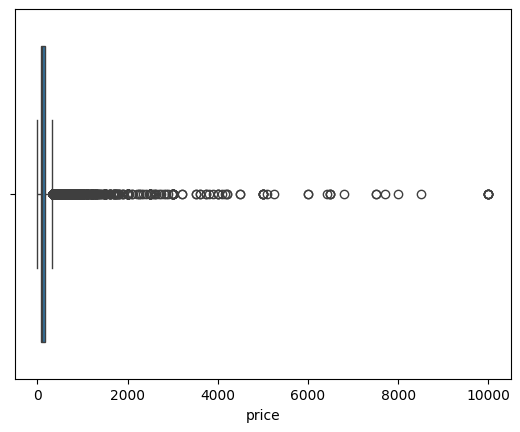

In [ ]:
# Analysize the outlier
sns.boxplot(x=df.price)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

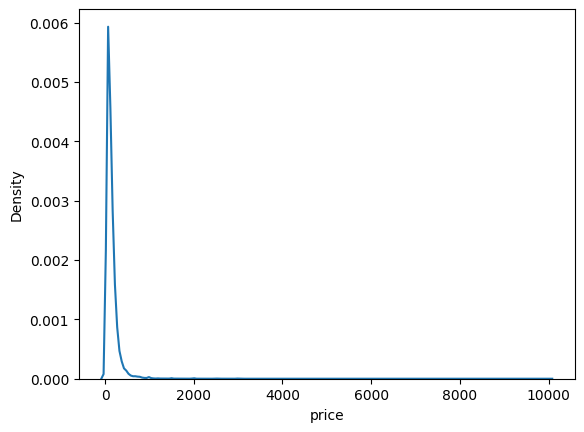

In [ ]:
sns.kdeplot(data=df['price'])

In [ ]:
df.price.skew() # 19 --> It tells that the data is highly right skewed

np.float64(19.118938995046033)

In [ ]:
def iqr(dfcols):
  q1 = np.percentile(dfcols,25)
  q3 = np.percentile(dfcols,75)

  IQR = q3-q1

  LF = q1 - (0.55*IQR)
  UF = q3 + (1.5*IQR)

  return UF, LF

In [ ]:
upperFence, lowerFence = iqr(df['price'])
print(f'UpperFence: {upperFence} and the lowerFence: {lowerFence}')

UpperFence: 334.0 and the lowerFence: 10.699999999999996


In [ ]:
df = df[(df.price >= lowerFence) & (df.price <= upperFence)]

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


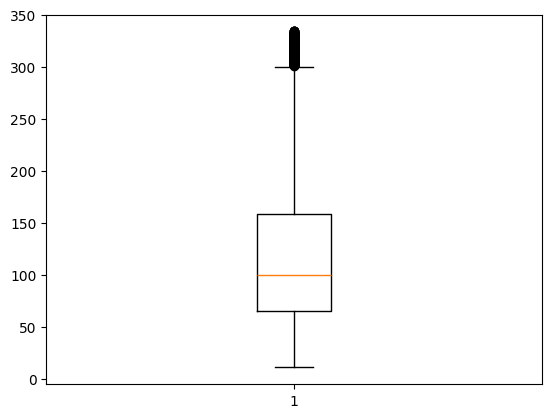

In [ ]:
plt.boxplot(df.price)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

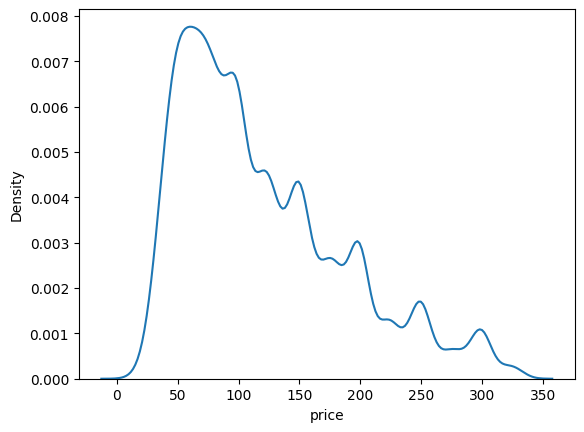

In [ ]:
sns.kdeplot(df.price)

In [ ]:
df.price.skew()

np.float64(19.118938995046033)

Let's Do visualization to support our assumptions

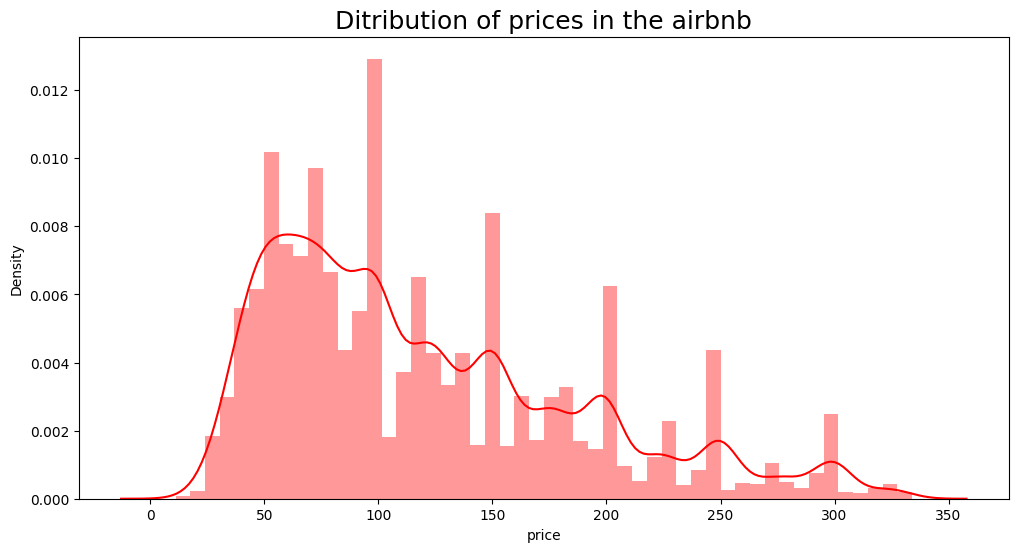

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(df['price'],color='red')
plt.title('Ditribution of prices in the airbnb', fontsize = 18)
plt.show()

In [ ]:
df.price.kurt() # Slight leptokurtosis but close to mesokurtic

np.float64(0.17272728427617734)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df,x = 'price',nbins = 10)
fig.update_layout(bargap = 0.1)
fig.show()

Assumption

data is slightly right skewed
Mean is around $120
median is 100

In [ ]:
df.price.median()

100.0

Busiest neighbourhood group

In [ ]:
df.columns

Index(['property_id', 'property_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'Total_reviews',
       'reviews_per_month', 'host_listing_count', 'Availabilty'],
      dtype='object')

In [ ]:
fig = px.histogram(df,x='neighbourhood_group')
fig.update_layout(bargap = 0.1)
fig.show()

Assumptions

Manhattan is the most popular and having more options of Airbnb as compared to others followed by brooklyn

Price Analysis
Neighbourhood group column can be used to calculate the avg price in each of these neighbourhood by using point plot

In [ ]:
dfAvgPrice = df.groupby('neighbourhood_group', as_index= False )['price'].mean()

In [ ]:
dfAvgPrice

,neighbourhood_group,price
0,Bronx,77.500936
1,Brooklyn,105.778247
2,Manhattan,146.009129
3,Queens,88.946981
4,Staten Island,89.235616


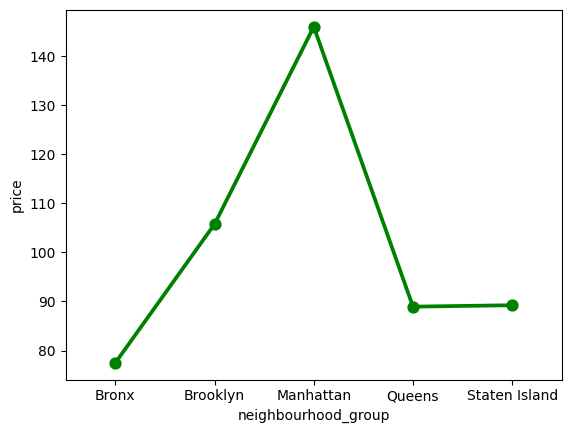

In [ ]:
sns.pointplot(x='neighbourhood_group', y = 'price',data=dfAvgPrice,color='green')
plt.show()

In [ ]:
fig = px.line(dfAvgPrice, x = 'neighbourhood_group', y = 'price',markers = True)
fig.show()

**Assumptions**
* Manhattan is the most expensive area as the average pricing in manhattan is around $146 followed by brooklyn and staten island

* cheapest Airbnb is available in bronx (avg price $77)

**Correlation**

Only numerical values --> CorrMat --> Heatmap

In [ ]:
numData = df.select_dtypes(include=['number'])
corrMat = numData.corr()

In [ ]:
corrMat

,property_id,host_id,latitude,longitude,price,minimum_nights,Total_reviews,reviews_per_month,host_listing_count,Availabilty
property_id,1.000000,0.581476,-0.008001,0.101260,-0.017736,-0.013663,-0.320508,0.285789,0.125639,0.073336
host_id,0.581476,1.000000,0.015962,0.144184,-0.034545,-0.017884,-0.136593,0.290307,0.147332,0.193683
latitude,-0.008001,0.015962,1.000000,0.091529,0.068797,0.025918,-0.012470,-0.011561,0.021427,-0.017369
longitude,0.101260,0.144184,0.091529,1.000000,-0.307033,-0.064226,0.053793,0.151343,-0.107675,0.096729
price,-0.017736,-0.034545,0.068797,-0.307033,1.000000,0.031405,-0.027750,-0.035400,0.174390,0.066534
minimum_nights,-0.013663,-0.017884,0.025918,-0.064226,0.031405,1.000000,-0.082867,-0.122730,0.133651,0.146418
Total_reviews,-0.320508,-0.136593,-0.012470,0.053793,-0.027750,-0.082867,1.000000,0.556266,-0.070551,0.183553
reviews_per_month,0.285789,0.290307,-0.011561,0.151343,-0.035400,-0.122730,0.556266,1.000000,-0.017199,0.189792
host_listing_count,0.125639,0.147332,0.021427,-0.107675,0.174390,0.133651,-0.070551,-0.017199,1.000000,0.225649
Availabilty,0.073336,0.193683,-0.017369,0.096729,0.066534,0.146418,0.183553,0.189792,0.225649,1.000000


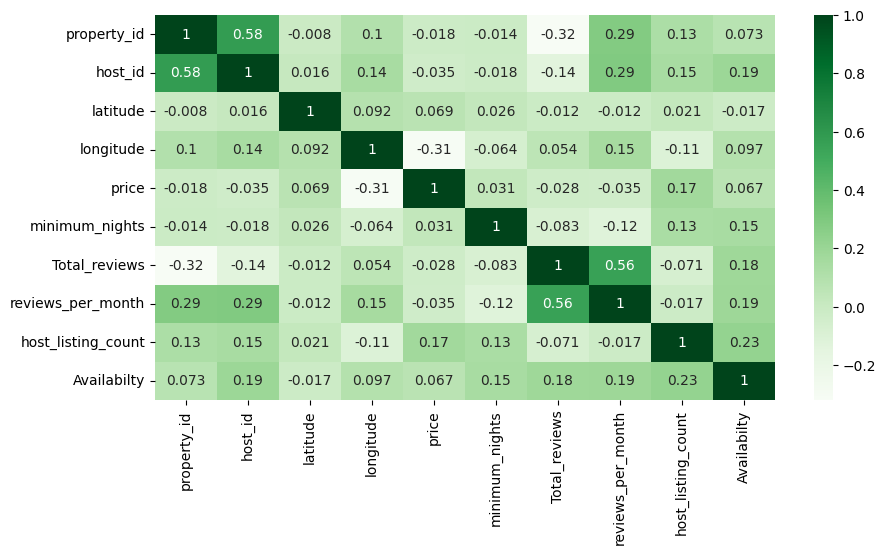

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(corrMat,annot=True,cmap = 'Greens')
plt.show()

**Insight**

1.Hosting ID and propertyID +58:
  *most of the owners when they got their liscense they also get it for their propertiies
2.Logitiude and price having -0.31 corr()
  *The properties in certain location where the tempreature is cold (high longitude) -> price will be cheap
3.Total reviews and reviews per month -> 0.60
  *if more monthly review we will get, total review will also increae
4.Total Reviews and property ID have a negative corr (-0.32)
   *Possibly, newer properties (higher property id) gets few reviews